Original File is affine_image from the matplotlib gallery<br />
It has been modified to explore the specification of a linear transformation with numpy matrices

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.transforms as mtransforms

In [1]:
%matplotlib inline

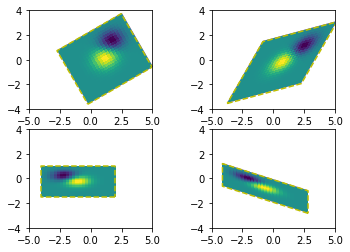

In [2]:
def get_image():
    delta = 0.25
    x = y = np.arange(-3.0, 3.0, delta)
    X, Y = np.meshgrid(x, y)
    Z1 = np.exp(-X**2 - Y**2)
    Z2 = np.exp(-(X - 1)**2 - (Y - 1)**2)
    Z = (Z1 - Z2)
    return Z


def do_plot(ax, Z, transform):
    im = ax.imshow(Z, interpolation='none',
                   origin='lower',
                   extent=[-2, 4, -3, 2], clip_on=True)

    trans_data = transform + ax.transData
    im.set_transform(trans_data)

    # display intended extent of the image
    x1, x2, y1, y2 = im.get_extent()
    ax.plot([x1, x2, x2, x1, x1], [y1, y1, y2, y2, y1], "y--",
            transform=trans_data)
    ax.set_xlim(-5, 5)
    ax.set_ylim(-4, 4)


# prepare image and figure
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2)
Z = get_image()

# image rotation
do_plot(ax1, Z, mtransforms.Affine2D().rotate_deg(30))

# image skew
do_plot(ax2, Z, mtransforms.Affine2D().skew_deg(30, 15))

# scale and reflection
do_plot(ax3, Z, mtransforms.Affine2D().scale(-1, .5))

# everything and a translation
do_plot(ax4, Z, mtransforms.Affine2D().
        rotate_deg(30).skew_deg(30, 15).scale(-1, .5).translate(.5, -1))

plt.show()

<class 'matplotlib.transforms.Affine2D'>


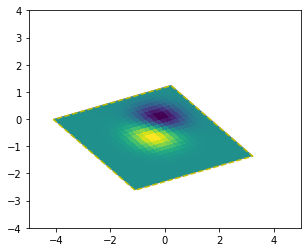

In [43]:
fig, ax = plt.subplots(1,1)
Z = get_image()

mt = mtransforms.Affine2D().rotate_deg(60).skew_deg(0,0).scale(-1, .5).translate(.5, -1)
print(type(mt))
do_plot(ax, Z, mt)

plt.show()

In [44]:
mt = mtransforms.Affine2D()
print(type(mt))

<class 'matplotlib.transforms.Affine2D'>


In [45]:
I = np.array([[ 1.0, 0.     ,  0.       ],
       [ 0.      ,  1.0,  0.       ],
       [ 0.       ,  0.       ,  1.       ]])

In [46]:
mt.set_matrix(I)
print(type(mt))

<class 'matplotlib.transforms.Affine2D'>


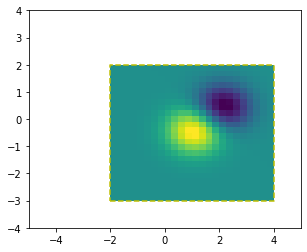

In [47]:
fig, ax = plt.subplots(1,1)
Z = get_image()
do_plot(ax, Z, mt)

plt.show()

In [40]:
M = mtransforms.Affine2D().rotate_deg(60).get_matrix()
print(type(M))
M

<class 'numpy.ndarray'>


array([[ 0.5      , -0.8660254,  0.       ],
       [ 0.8660254,  0.5      ,  0.       ],
       [ 0.       ,  0.       ,  1.       ]])

In [38]:
# mt.set_matrix(M)
mt.set_matrix(I)

print(type(mt))

<class 'matplotlib.transforms.Affine2D'>


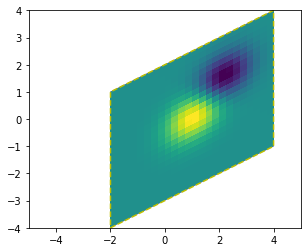

In [41]:
fig, ax = plt.subplots(1,1)
Z = get_image()
do_plot(ax, Z, mt)

plt.show()